In [ ]:
from keras.applications.vgg16 import VGG16
from glob import glob
import cv2
model = VGG16(include_top=True)

553476096/553467096 [==============================] - 3s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [ ]:
images = glob('/content/gdrive/MyDrive/flicker/flickr8k-sau/Flickr_Data/Images/'+'*.jpg')
len(images)

8091

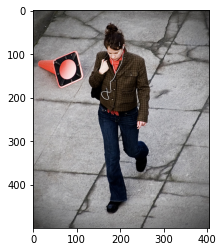

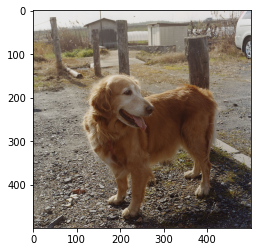

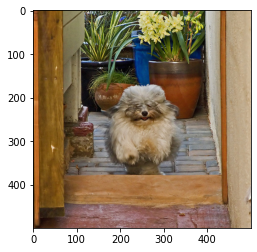

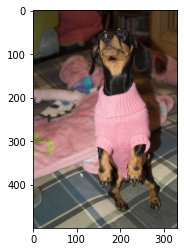

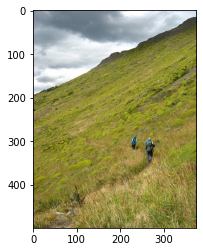

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=True)
# incept_model = ResNet50(include_top=True)

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Model
last = model.layers[-2].output
modele = Model(inputs = model.input,outputs = last)
modele.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(4096,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1200:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200


In [ ]:
len(images_features)

1201

In [ ]:
caption_path = '/content/gdrive/MyDrive/flicker/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'
len(caption_path)

91

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions[0].split('\t')[0][:-2] 

'1000268201_693b08cb0e.jpg'

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
captions_dict

{'3512033659_7e8a0c2ffa.jpg': ['A crowd of Hindu women in headwraps .',
  'A group of woman wearing scarves on their heads crowd together next to a building .',
  'A street is filled with Indian people in a market .',
  'Many individuals with coverings on their heads crowded together .',
  'The crowds are huge as the citizens await the opening .'],
 '3512791890_eb065b460a.jpg': ['A girl and woman are posing while sitting on a carpeted staircase .',
  'A smiling woman holds a smiling toddler in a yellow dress .',
  'A woman and a young girl are happily sitting together .',
  'A woman has her arm around a small girl and they are smiling .',
  'a young girl and a woman smile for the camera .'],
 '3513265399_a32e8cfd18.jpg': ['A baseball player slides home in a non professional baseball game in an HDR photograph .',
  'A child is sliding into home plate and the catcher is waiting .',
  'A player is sliding into home plate with the catcher guarding it .',
  'A runner is sliding into home wh

In [ ]:
len(captions_dict)

1201

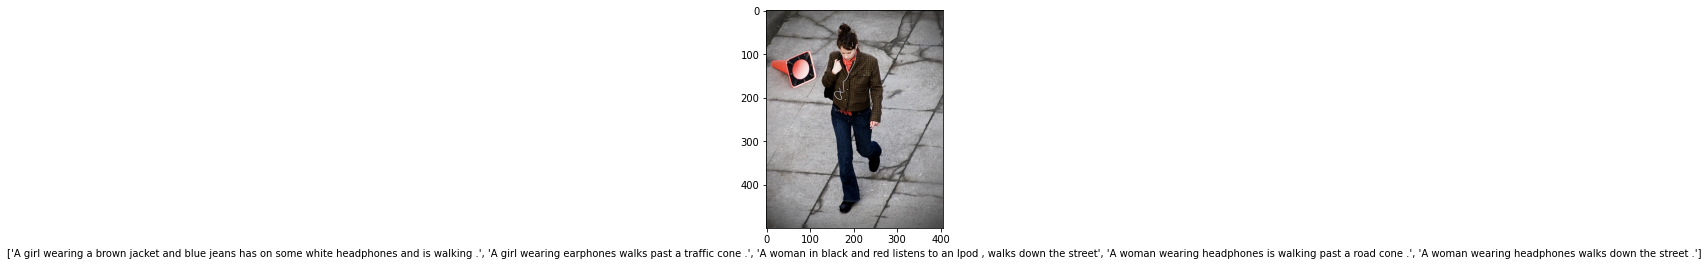

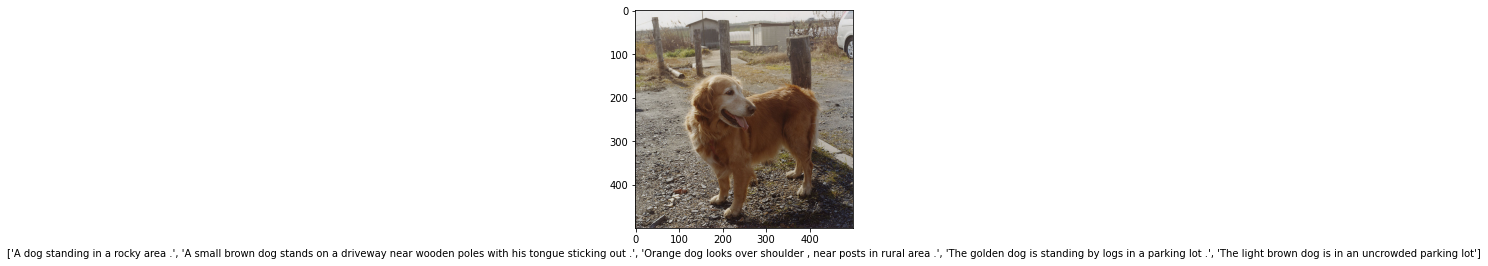

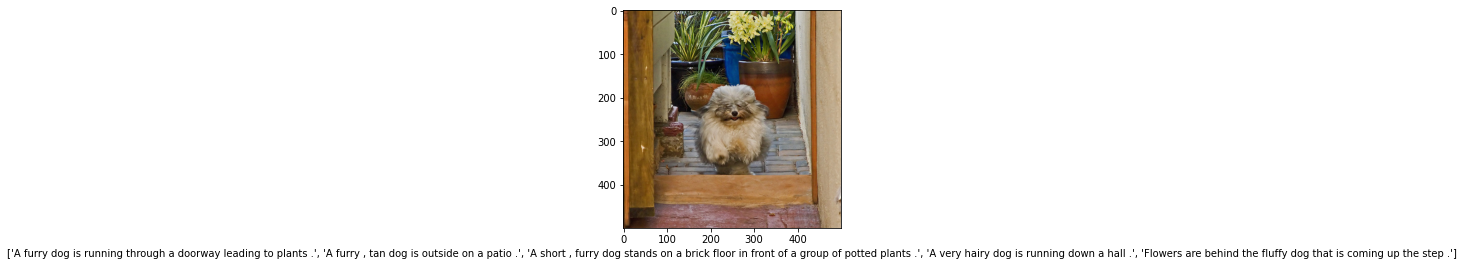

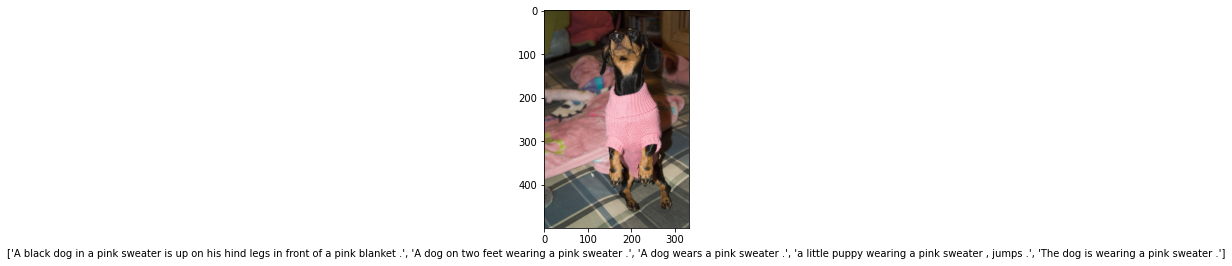

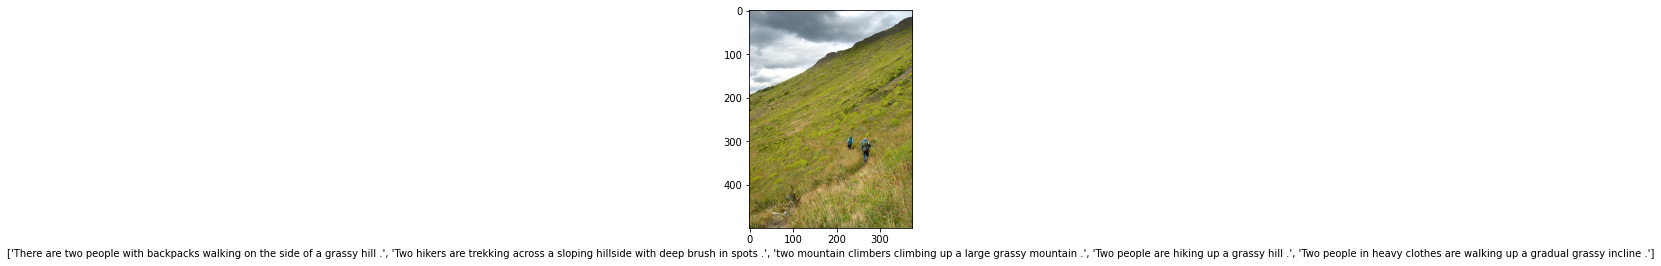

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

/content/gdrive/MyDrive/flicker/flickr8k-sau/Flickr_Data/Images/385835044_4aa11f6990.jpg


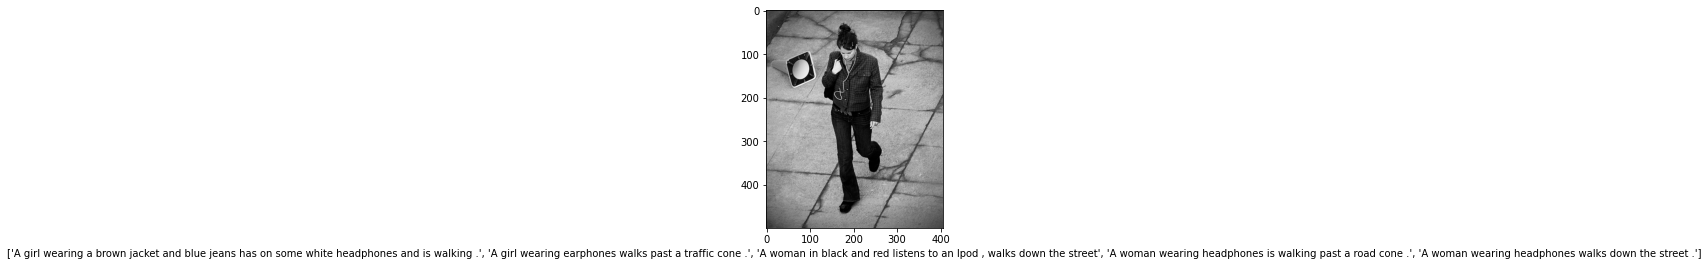

In [ ]:
import matplotlib.pyplot as plt
# print(images_features.keys())
for k in images_features.keys():
    plt.figure()
#     print(k)
    img_name = '/content/gdrive/MyDrive/flicker/flickr8k-sau/Flickr_Data/Images/'+k
    print(img_name)
    img = cv2.imread(img_name,2)
#     print(img)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
print(captions_dict)

{'3512033659_7e8a0c2ffa.jpg': ['startofseq a crowd of hindu women in headwraps . endofseq', 'startofseq a group of woman wearing scarves on their heads crowd together next to a building . endofseq', 'startofseq a street is filled with indian people in a market . endofseq', 'startofseq many individuals with coverings on their heads crowded together . endofseq', 'startofseq the crowds are huge as the citizens await the opening . endofseq'], '3512791890_eb065b460a.jpg': ['startofseq a girl and woman are posing while sitting on a carpeted staircase . endofseq', 'startofseq a smiling woman holds a smiling toddler in a yellow dress . endofseq', 'startofseq a woman and a young girl are happily sitting together . endofseq', 'startofseq a woman has her arm around a small girl and they are smiling . endofseq', 'startofseq a young girl and a woman smile for the camera . endofseq'], '3513265399_a32e8cfd18.jpg': ['startofseq a baseball player slides home in a non professional baseball game in an hd

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
len(count_words)

3535

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
len(new_dict)

3535

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
new_dict

{'startofseq': 1,
 'a': 2,
 'crowd': 3,
 'of': 4,
 'hindu': 5,
 'women': 6,
 'in': 7,
 'headwraps': 8,
 '.': 9,
 'endofseq': 10,
 'group': 11,
 'woman': 12,
 'wearing': 13,
 'scarves': 14,
 'on': 15,
 'their': 16,
 'heads': 17,
 'together': 18,
 'next': 19,
 'to': 20,
 'building': 21,
 'street': 22,
 'is': 23,
 'filled': 24,
 'with': 25,
 'indian': 26,
 'people': 27,
 'market': 28,
 'many': 29,
 'individuals': 30,
 'coverings': 31,
 'crowded': 32,
 'the': 33,
 'crowds': 34,
 'are': 35,
 'huge': 36,
 'as': 37,
 'citizens': 38,
 'await': 39,
 'opening': 40,
 'girl': 41,
 'and': 42,
 'posing': 43,
 'while': 44,
 'sitting': 45,
 'carpeted': 46,
 'staircase': 47,
 'smiling': 48,
 'holds': 49,
 'toddler': 50,
 'yellow': 51,
 'dress': 52,
 'young': 53,
 'happily': 54,
 'has': 55,
 'her': 56,
 'arm': 57,
 'around': 58,
 'small': 59,
 'they': 60,
 'smile': 61,
 'for': 62,
 'camera': 63,
 'baseball': 64,
 'player': 65,
 'slides': 66,
 'home': 67,
 'non': 68,
 'professional': 69,
 'game': 70,
 'a

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'3512033659_7e8a0c2ffa.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  [1, 2, 11, 4, 12, 13, 14, 15, 16, 17, 3, 18, 19, 20, 2, 21, 9, 10],
  [1, 2, 22, 23, 24, 25, 26, 27, 7, 2, 28, 9, 10],
  [1, 29, 30, 25, 31, 15, 16, 17, 32, 18, 9, 10],
  [1, 33, 34, 35, 36, 37, 33, 38, 39, 33, 40, 9, 10]],
 '3512791890_eb065b460a.jpg': [[1,
   2,
   41,
   42,
   12,
   35,
   43,
   44,
   45,
   15,
   2,
   46,
   47,
   9,
   10],
  [1, 2, 48, 12, 49, 2, 48, 50, 7, 2, 51, 52, 9, 10],
  [1, 2, 12, 42, 2, 53, 41, 35, 54, 45, 18, 9, 10],
  [1, 2, 12, 55, 56, 57, 58, 2, 59, 41, 42, 60, 35, 48, 9, 10],
  [1, 2, 53, 41, 42, 2, 12, 61, 62, 33, 63, 9, 10]],
 '3513265399_a32e8cfd18.jpg': [[1,
   2,
   64,
   65,
   66,
   67,
   7,
   2,
   68,
   69,
   64,
   70,
   7,
   71,
   72,
   73,
   9,
   10],
  [1, 2, 74, 23, 75, 76, 67, 77, 42, 33, 78, 23, 79, 9, 10],
  [1, 2, 65, 23, 75, 76, 67, 77, 25, 33, 78, 80, 81, 9, 10],
  [1, 2, 82, 23, 75, 76, 67, 44, 33, 83, 84, 33, 77, 7, 2, 85, 70, 9, 10],
  [1, 2, 

In [ ]:
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from tensorflow.keras.layers import concatenate
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
MAX_LEN=0
for k,vv in captions_dict.items():
    for v in vv:
        if len(v)>MAX_LEN:
            MAX_LEN=len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 11, 4, 12, 13, 14, 15, 16, 17, 3, 18, 19, 20, 2, 21, 9, 10]
[1, 2, 82, 23, 75, 76, 67, 44, 33, 83, 84, 33, 77, 7, 2, 85, 70, 9, 10]
[1, 2, 98, 86, 20, 89, 2, 90, 44, 2, 82, 86, 20, 99, 33, 94, 7, 2, 100, 70, 9, 10]
[1, 2, 64, 65, 7, 2, 163, 201, 42, 133, 202, 23, 194, 33, 191, 93, 2, 51, 90, 203, 204, 27, 205, 15, 9, 10]
[1, 2, 51, 128, 25, 2, 127, 290, 23, 7, 2, 116, 122, 42, 291, 20, 89, 2, 51, 42, 285, 286, 7, 234, 283, 9, 10]
[1, 2, 155, 25, 387, 15, 149, 225, 23, 380, 140, 33, 12, 25, 2, 133, 385, 42, 163, 501, 19, 20, 447, 203, 319, 7, 293, 4, 2, 163, 502, 499, 9, 10]


In [ ]:
MAX_LEN

34

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=30, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)

(77675, 77675, 77675)

In [ ]:
import numpy as np

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

((77675, 4096), (77675, 30), (77675, 3536))

In [ ]:
X[1510]

array([0.78412235, 1.838932  , 0.49842903, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
embedding_size = 128
max_len = 30
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(4096,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               524416    
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
Total params: 524,416
Trainable params: 524,416
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 128)           452608    
                                                                 
 lstm (LSTM)                 (None, 30, 256)           394240    
                            

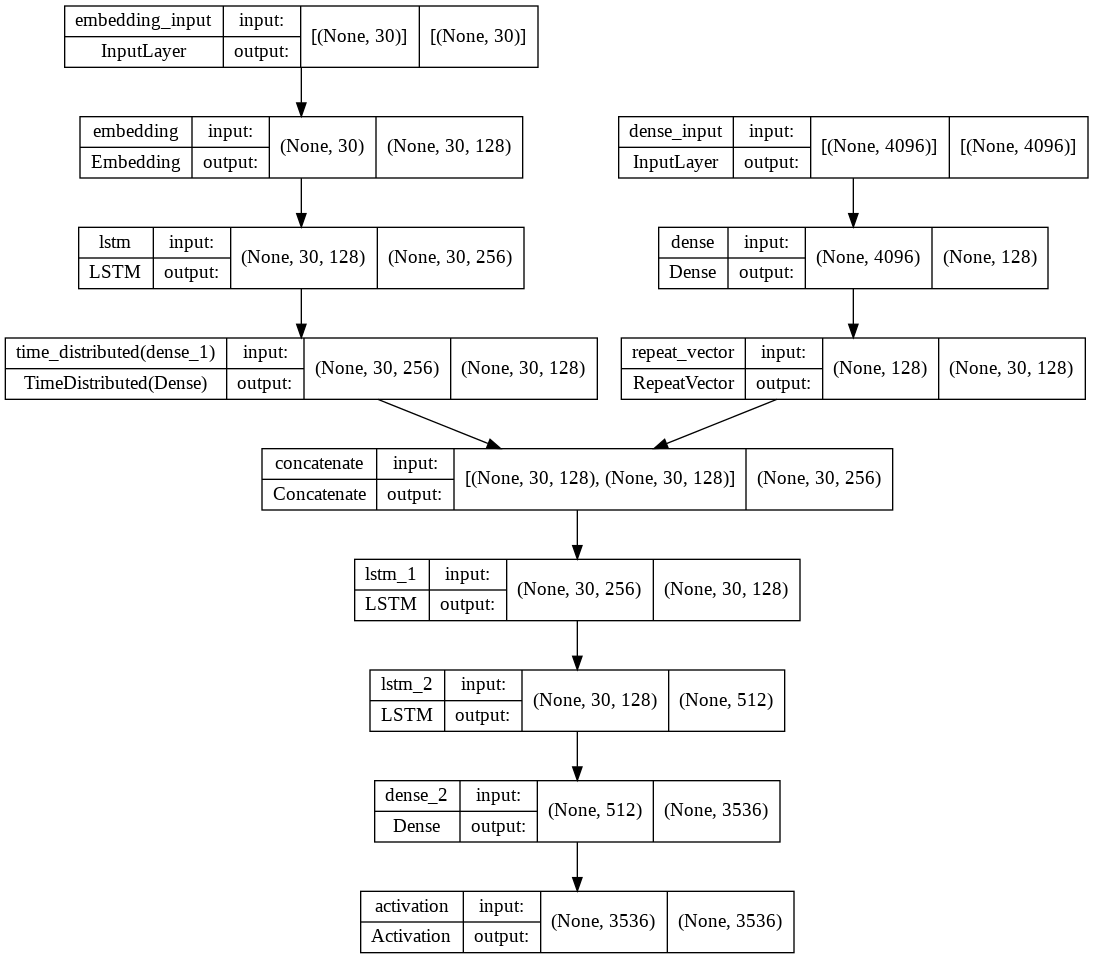

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

Epoch 1/100
152/152 [==============================] - 18s 76ms/step - loss: 5.1062 - accuracy: 0.1600
Epoch 2/100
152/152 [==============================] - 12s 77ms/step - loss: 4.5174 - accuracy: 0.2377
Epoch 3/100
152/152 [==============================] - 12s 77ms/step - loss: 4.3208 - accuracy: 0.2577
Epoch 4/100
152/152 [==============================] - 11s 76ms/step - loss: 4.1860 - accuracy: 0.2662
Epoch 5/100
152/152 [==============================] - 11s 75ms/step - loss: 4.0792 - accuracy: 0.2730
Epoch 6/100
152/152 [==============================] - 11s 75ms/step - loss: 3.9684 - accuracy: 0.2836
Epoch 7/100
152/152 [==============================] - 11s 75ms/step - loss: 3.8175 - accuracy: 0.2999
Epoch 8/100
152/152 [==============================] - 11s 75ms/step - loss: 3.6296 - accuracy: 0.3190
Epoch 9/100
152/152 [==============================] - 11s 75ms/step - loss: 3.4744 - accuracy: 0.3408
Epoch 10/100
152/152 [==============================] - 11s 75ms/step - l

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [ ]:
model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)
model.save_weights("modelfinal.h5")
print("Saved model to disk")  

Saved model to disk
